In [2]:
#ライブラリの読み込み
import numpy as np
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

%precision 3

#可視化用
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline


#単回帰分析用
from sklearn import linear_model

データの用意

In [3]:
pwd

'C:\\Users\\kazuy\\OneDrive\\ドキュメント\\jupyiter\\data'

In [4]:
#Zipファイルとファイルダウンロード用ライブラリの読み込み
import requests, zipfile
from io import StringIO
import io

In [5]:
#データのダウンロード
#url ='https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'
#データをURLから取得する
#r = requests.get(url, stream=True)
#zipfileを読み込み展開する
#z = zipfile.ZipFile(io.BytesIO(r.content))
#z.extractall()

In [6]:
student_data_math = pd.read_csv('./sample_data/student-mat.csv')
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [7]:
student_data_math = pd.read_csv('./sample_data/student-mat.csv',sep=';')
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [8]:
#すべてのカラムの情報をチェック
student_data_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

量的データと質的データ

In [9]:
#量的データ:四則演算適用可能
print('量的データの例')
print(student_data_math['absences'].head())
#質的データ:四則演算適用不可能
print('質的データの例')
print(student_data_math['sex'].head())

量的データの例
0     6
1     4
2    10
3     2
4     4
Name: absences, dtype: int64
質的データの例
0    F
1    F
2    F
3    F
4    F
Name: sex, dtype: object


In [10]:
#質的データのカテゴリーごとに量的データの平均値を求める
#ex)男女(質的)の年齢(量的)の平均値
student_data_math.groupby('sex')['age'].mean()

sex
F    16.730769
M    16.657754
Name: age, dtype: float64

記述統計

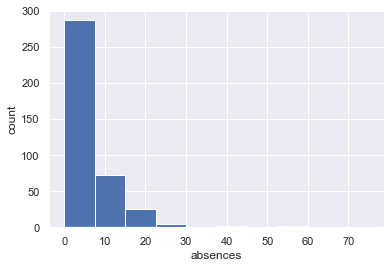

In [11]:
#ヒストグラム
plt.hist(student_data_math['absences'])
plt.xlabel('absences')
plt.ylabel('count')
plt.grid(True)

In [12]:
#平均、中央、最頻
print('平均値:',student_data_math['absences'].mean())
print('中央:',student_data_math['absences'].median())
print('最頻:',student_data_math['absences'].mode())

平均値: 5.708860759493671
中央: 4.0
最頻: 0    0
dtype: int64


In [13]:
#分散、標準偏差
print('分散値:',student_data_math['absences'].var(ddof=0))
print('標準偏差:',student_data_math['absences'].std(ddof=0))
print('標準偏差(分散の平方根ver):',np.sqrt(student_data_math['absences'].var(ddof=0)))

分散値: 63.887389841371515
標準偏差: 7.992958766400057
標準偏差(分散の平方根ver): 7.992958766400057


In [14]:
#要約統計量
student_data_math['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [15]:
#四分位範囲(IQR)
#[describeのインデックス]で75%-25%をする
student_data_math['absences'].describe()[6] - student_data_math['absences'].describe()[4]

8.0

In [16]:
#全体
student_data_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


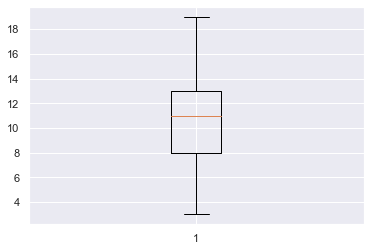

In [17]:
#箱ひげ図:G1
plt.boxplot(student_data_math['G1'])
plt.grid(True)

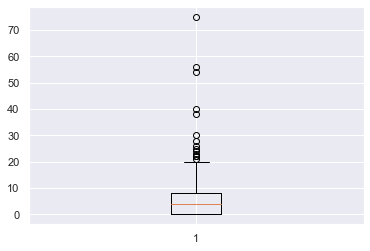

In [18]:
#箱ひげ図:欠席数(外れ値は除外±IQR*1.5)
plt.boxplot(student_data_math['absences'])
plt.grid(True)

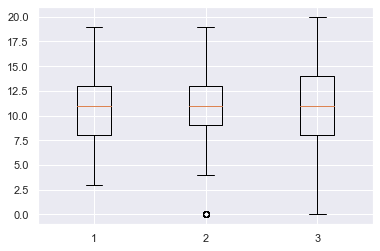

In [20]:
#箱ひげ図:G1,G2,G3
plt.boxplot([student_data_math['G1'],student_data_math['G2'],student_data_math['G3']])
plt.grid(True)

In [21]:
#変動係数(CV):標準偏差/平均値(zスコアとは違う)
student_data_math['absences'].std()/student_data_math['absences'].mean()

1.402

In [22]:
#全体の変動係数
student_data_math.std()/student_data_math.mean()

age           0.076427
Medu          0.398177
Fedu          0.431565
traveltime    0.481668
studytime     0.412313
failures      2.225319
famrel        0.227330
freetime      0.308725
goout         0.358098
Dalc          0.601441
Walc          0.562121
health        0.391147
absences      1.401873
G1            0.304266
G2            0.351086
G3            0.439881
dtype: float64

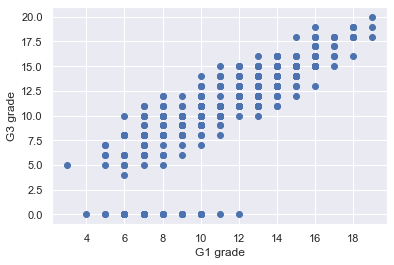

In [23]:
#散布図
plt.plot(student_data_math['G1'],student_data_math['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')
plt.grid(True)

In [24]:
#共分散行列
np.cov(student_data_math['G1'],student_data_math['G3'])

array([[11.017, 12.188],
       [12.188, 20.99 ]])

In [25]:
#分散の確認
print(student_data_math['G1'].var())
print(student_data_math['G3'].var())

11.017053267364899
20.989616397866737


In [26]:
#相関係数(ピアソン)
sp.stats.pearsonr(student_data_math['G1'],student_data_math['G3'])

(0.801467932017414, 9.001430312277865e-90)

In [28]:
#相関行列
np.corrcoef([student_data_math['G1'], student_data_math['G3']])

array([[1.   , 0.801],
       [0.801, 1.   ]])

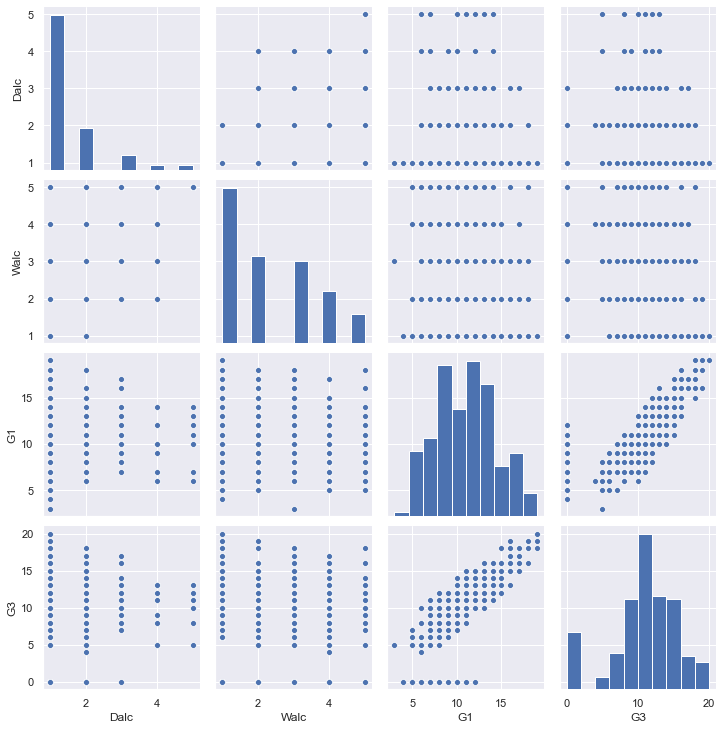

In [29]:
#複数の変数の散布図やヒストグラムを書く(Seabornパッケージのpairplotを使用)
sns.pairplot(student_data_math[['Dalc','Walc','G1','G3']])
plt.grid(True)

In [30]:
#ex)週末にアルコールを飲む人(Walc)の1学期のテストの成績(G1)の平均値
student_data_math.groupby('Walc')['G1'].mean()

Walc
1    11.178808
2    11.270588
3    10.937500
4     9.980392
5     9.964286
Name: G1, dtype: float64

単回帰分析

In [31]:
#線形単回帰分析
#単回帰分析の中でも説明変数と目的変数の関係性が線形(y=ax+B)の関係に成り立つことを想定。

from sklearn import linear_model
#線形回帰のインスタンスを生成
reg = linear_model.LinearRegression()

In [32]:
#<説明変数に一学期の数学の成績(G1)を利用>
X = student_data_math.loc[:,['G1']].values
#locはデータフレームから、行と列を指定して取り出す。ex)loc[:,['G1']]はG1の列の全体を抽出
#valuesに直しているので注意

#<目的変数に三学期の数学の成績(G3)を利用>
Y = student_data_math['G3'].values

#予測モデルを計算。ここでa(回帰係数:傾き),b(切片)を算出。※最小二乗法を用いている(fit関数)
#最小二乗法:残差平方和の最小値を偏微分で求めることで、回帰直線の式を求める。
reg.fit(X,Y)

#回帰係数
print('回帰係数:',reg.coef_)

#切片
print('切片:',reg.intercept_)

回帰係数: [1.106]
切片: -1.6528038288004616


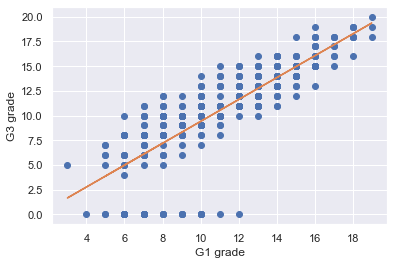

In [33]:
#散布図
plt.plot(student_data_math['G1'],student_data_math['G3'], 'o')
plt.ylabel('G3 grade')
plt.xlabel('G1 grade')

#上に回帰直線を引く
plt.plot(X,reg.predict(X))
plt.grid(True)

In [34]:
#決定係数
print('決定係数:',reg.score(X,Y))

決定係数: 0.64235084605227
